Project: An Income Classification Model for U.S. Citizens Using Census Data using KNN



Accuracy of the Model: 0.8258371090728257
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6796
           1       0.70      0.53      0.60      2253

    accuracy                           0.83      9049
   macro avg       0.78      0.73      0.75      9049
weighted avg       0.82      0.83      0.82      9049



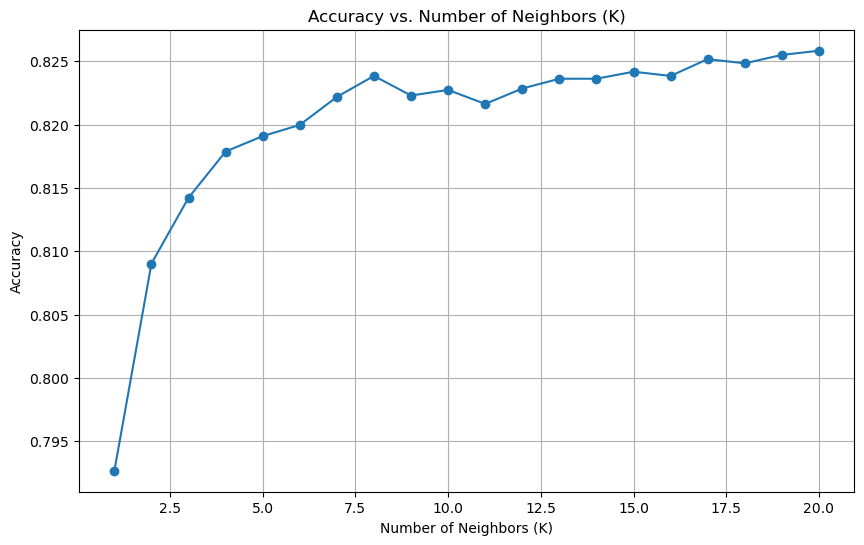

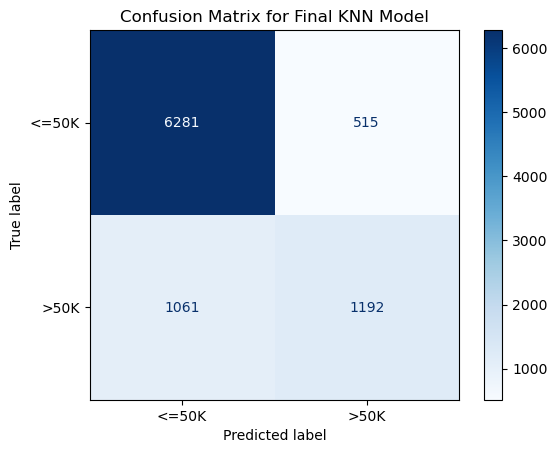

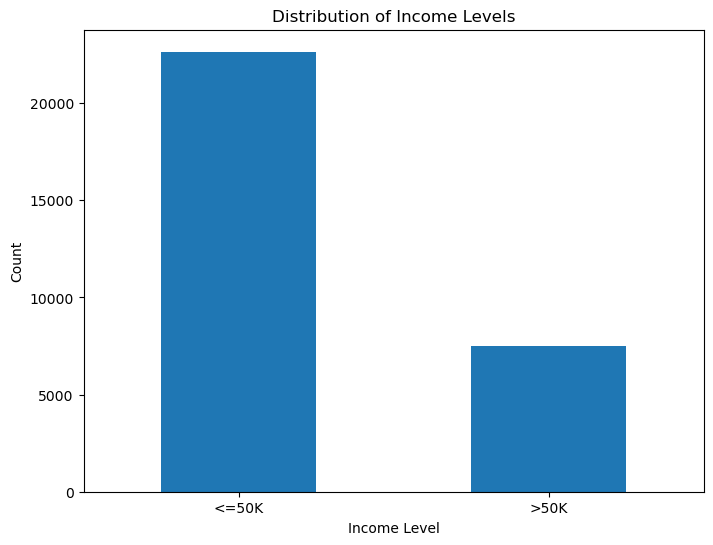

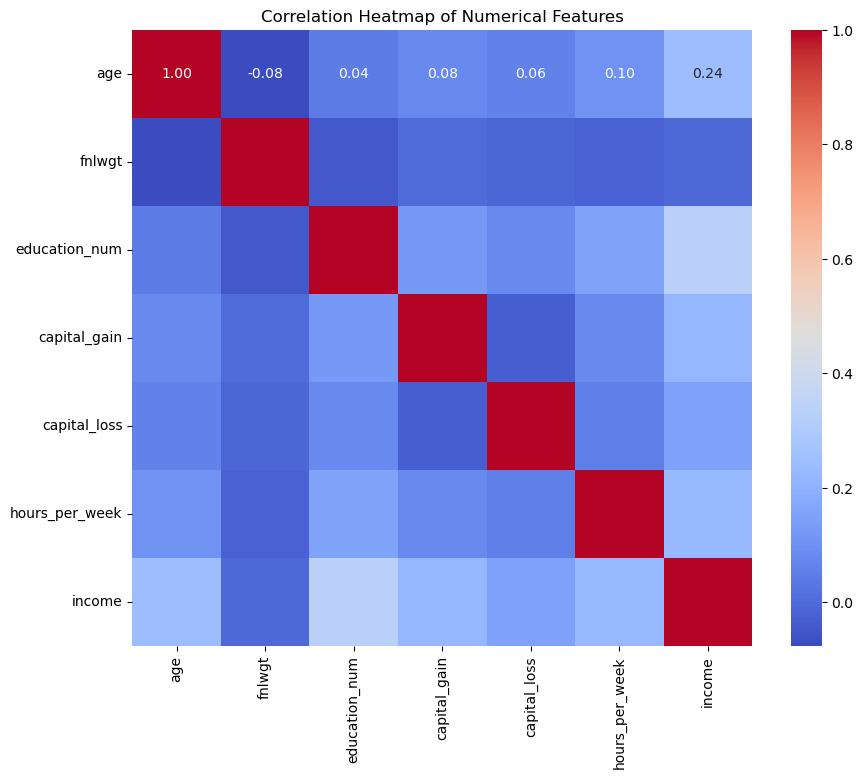

In [16]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

# Load the dataset
census_data = pd.read_csv('adult.csv')
# Renaming columns for consistency and readability
census_data.columns = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
    "occupation", "relationship", "race", "sex", "capital_gain", 
    "capital_loss", "hours_per_week", "native_country", "income"
]

# Replace "?" with NaN and drop rows with missing values
census_data.replace(' ?', np.nan, inplace=True)
census_data.dropna(inplace=True)

# Strip leading/trailing whitespaces in object columns
census_data = census_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Encode target variable 'income'
census_data['income'] = census_data['income'].map({'<=50K': 0, '>50K': 1})

# Encode categorical variables using one-hot encoding
census_data_encoded = pd.get_dummies(census_data, drop_first=True)

# Split features and target variable
X = census_data_encoded.drop('income', axis=1)
y = census_data_encoded['income']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find optimal K using cross-validation
accuracy_results = {}
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_test_scaled, y_test)
    accuracy_results[k] = accuracy

# Find the K with the best accuracy
optimal_k = max(accuracy_results, key=accuracy_results.get)

# Train final KNN model with optimal K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)
y_pred = final_knn.predict(X_test_scaled)

# Evaluate the final model
final_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Model:',final_accuracy)
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Visualization 1: Accuracy vs. K
plt.figure(figsize=(10, 6))
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Visualization 2: Confusion Matrix for Final Model
ConfusionMatrixDisplay.from_estimator(final_knn, X_test_scaled, y_test, display_labels=["<=50K", ">50K"], cmap='Blues')
plt.title('Confusion Matrix for Final KNN Model')
plt.show()

# Visualization 3: Distribution of Income Levels
income_distribution = census_data['income'].value_counts().rename(index={0: '<=50K', 1: '>50K'})
income_distribution.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Visualization 4: Correlation Heatmap of Numerical Features
numerical_data = census_data[["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week", "income"]]
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
